#Sept 16 Prep: Parts of Speech and Tagging 

####READING:

Read [Sections 5.1 and 5.2](http://www.nltk.org/book/ch05.html) on parts of speech to introduce you to tagging.  Section 5.3 is on python dictionaries which probably covers things you already know, but may give you a handy tip or two, especially if you don't know about DefaultDict and how to invert a dictionary.  For further reading about any particular part of speech or other detail of English grammar, I recommend this Wikipedia article on [English compounding](https://en.wikipedia.org/wiki/English_compound).

For specific questions, something that is often helpful is a quick search on [grammar.about.com](grammar.about.com) (Links to an external site.) .

####ACTIVITY: 

(I suggest you wait to do this until after Monday's class, since we will be practicing in class.)   Select 3 sentences from your text collection (they do not need to be consecutive).  I suggest trying to find sentences that vary from one another lexically and syntactically and that might vary according to how much they will challenge the part of speech tagger.  Enter them into the demo at this [link](http://cogcomp.cs.illinois.edu/page/demo_view/POS), produce the output, and analyzing the results to determine whether or not the resulting part of speech tags are correct.  Do the best you can, given that I realize many of you are new to syntax.  Write up your results and turn that writeup in.

In [15]:
import nltk, re, pprint
from nltk import word_tokenize
import random
sent_tokenizer=nltk.data.load('tokenizers/punkt/english.pickle')

In [2]:
tal = open("../tal_stories/tal_text.txt", "r")
tal_text = tal.read()
sentences = sent_tokenizer.tokenize(tal_text)
print(sentences[1])

I listen to a lot of podcasts.


## Find Sentences from the Collection

In [59]:
pattern = r'''(?x)    # set flag to allow verbose regexps
    <
    | :
    | ([A-Z]\.)+        # abbreviations, e.g. U.S.A.
   | \w+([-']\w+)*        # words with optional internal hyphens
   | \$?\d+(\.\d+)?%?  # currency and percentages, e.g. $12.40, 82%
   | \.\.\.            # ellipsis
   | [.,;"'?():-_`]+  # these are separate tokens
 '''

def print_random_items(array, n):
    random_index = random.randint(0, len(array))
    for item in array[max(random_index-n, 0): random_index]:
        print(item)


In [61]:
print_random_sentences(sentences, 10)

It's someone lying under a bridge they didn't build, demanding payment from anybody who passed.
I said, how about a patent troll?
<HOST:ALEX BLUMBERG> The name stuck, and if anything, the problem of patent trolls just got worse.
From 2004 to 2009, the number of patent infringement lawsuits jumped by 70%.
Licensing fee requests, like what happened to Peter Detkin and to FotoTime, went up 650%.
Today, pretty much any time you talk to a computer or tech person in Silicon Valley and the subject of patents comes up, everyone groans.
<HOST:LAURA SYDELL> I hear those groans a lot.
I live out here in San Francisco, and just to get a flavor of this, the other day I went down to a park called South Park around noon.
It's a place where a lot of tech workers eat their lunch.
And the sentiment is universal.


## Sentences of Parts of Speech Tagging

#### Sentence 1
It's someone lying under a bridge they didn't build, demanding payment from anybody who passed.

#### Sentence 2
Today, pretty much any time you talk to a computer or tech person in Silicon Valley and the subject of patents comes up, everyone groans.

#### Sentence 3
I live out here in San Francisco, and just to get a flavor of this, the other day I went down to a park called South Park around noon.

# Parts of Speech Tagging
from http://cogcomp.cs.illinois.edu/page/demo_view/POS

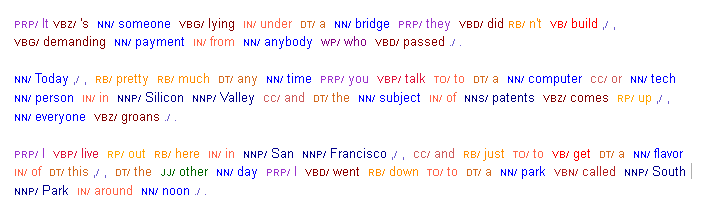

In [62]:
from IPython.display import Image
Image(filename='Collection Parts of Speech Tagging.PNG')

PRP It VBZ 's  NN someone  VBG lying  IN under  DT a  NN bridge  PRP they  VBD did RB n't  VB build , ,  VBG demanding  NN payment  IN from  NN anybody  WP who  VBD passed . . 

NN Today , ,  RB pretty  RB much  DT any  NN time  PRP you  VBP talk  TO to  DT a  NN computer  CC or  NN tech  NN person  IN in  NNP Silicon  NNP Valley  CC and  DT the  NN subject  IN of  NNS patents  VBZ comes  RP up , ,  NN everyone  VBZ groans . . 

PRP I  VBP live  RP out  RB here  IN in  NNP San  NNP Francisco , ,  CC and  RB just  TO to  VB get  DT a  NN flavor  IN of  DT this , ,  DT the  JJ other  NN day  PRP I  VBD went  RB down  TO to  DT a  NN park  VBN called  NNP South  NNP Park  IN around  NN noon . . 

# Write Up

The have mixed feelings about the results produced by the parts of speech tagger. I am pleasantly surprised by how well the tagger responded to word shortenings (I'm not sure what the grammatical term of this is), for example "It's" vs "It is" and "didn't" vs "did not". It categorized the "'s" part of "It's" as a separate token from "It" and categorized it as a present tense verb. Although, I am not quite sure if it should be a 3rd preson singular present verb (VBZ). The tagger also categorized "n't" part of "didn't" separately from "did" and it categorized it as an adverb (rb), which I think is accurate.

My methodology for finding mistakes in the tagger was to start with the parts of speech that occur most frequently. I, therefore, started with nouns. While the tagger did a good job of identifying all of the nouns (high sensitivity), it also had a decent number of false positives (low specificity). For example, "computer" and "tech" from "computer and tech person" were categorized as nouns, when they were being used as adjectives. It was also interesting to see that it treated "San Francisco" as two proper singular nouns "San" and "Francisco" and the same for "Silicon Valley" as "Silicon" and "Valley". While it is true, that they are proper nouns, it should only be for the combination of those two words, respectively. My guess is that it properly recognized them as proper singular nouns because the first letters were capitalized. To test this hypothesis, I ran the tagger again, without capitalizing those words (see figure 1.1). The tagger now categorized those words as nouns rather than as proper singular nouns. So, this may have some implications on tagging sentences that have been processed through string.lower().

#### Figure 1.1

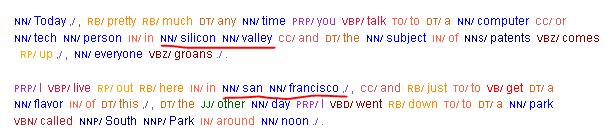

In [63]:
Image(filename='figure_1-1.PNG')